# PROYECTO FINAL MODULO 5: ENTRENAMIENTO DE MODELO DE MACHINE LEARNING PARA DETERMINAR SI UN PACIENTE SUFRE DE ANEMIA

## FUENTE : [DATOS ABIERTOS](https://www.datosabiertos.gob.pe/dataset/morbilidad-anemia)

In [ ]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET_PATH = '/content/TB_ANEMIA.csv'
df_anemia = pd.read_csv(DATASET_PATH,sep = ";")
df_anemia.head(10)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,40971314,2,A,M,NaN,20230522,D649,D,6203
1,39270343,4,A,M,1128.0,20211122,D509,D,10836
2,39270343,4,A,M,1128.0,20211129,D509,D,10836
3,39155787,3,A,F,1128.0,20210527,D509,D,10836
4,36178995,2,A,F,1299.0,20210215,D509,D,6079
5,38926264,4,A,M,1506.0,20211113,D509,D,7475
6,39141175,1,A,M,1128.0,20210220,D509,D,6856
7,40229751,2,A,M,1278.0,20221120,D509,D,4416
8,39603123,1,A,M,1278.0,20210428,D509,D,4416
9,39105165,1,A,M,1128.0,20210106,D509,D,10836


# EDA

In [ ]:
df_anemia.shape

(1327924, 9)

In [ ]:
df_anemia.dtypes

,0
id_persona,int64
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64


# TRATAMIENTO DE NULOS

In [ ]:
df_anemia.isnull().sum().sum()

10817

In [ ]:
df_anemia.isnull().sum()

,0
id_persona,0
Edad,0
Tipo_edad,0
Sexo,0
id_ubigeo,10817
Fecha_atencion,0
Diagnostico,0
Tipo_Dx,0
id_eess,0


In [ ]:
df_anemia.dropna(subset=['id_ubigeo'],inplace=True)
df_anemia.shape

(1317107, 9)

# TRATAMIENTO DE DUPLICADOS

In [ ]:
df_anemia.duplicated().sum()

19287

In [ ]:
df_anemia[df_anemia.duplicated()]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
329,38985611,1,A,F,26.0,20210716,D509,D,5081
369,38942468,1,A,M,42.0,20210627,D509,D,5183
610,38954543,2,A,F,42.0,20211210,D509,D,5180
612,38954543,2,A,F,42.0,20211110,D509,D,5180
827,39153550,2,A,F,26.0,20220329,D509,D,6977
...,...,...,...,...,...,...,...,...,...
1327513,35766370,2,A,F,1283.0,20210820,D509,D,5882
1327576,26591876,2,A,F,675.0,20211108,D509,D,4574
1327624,23789774,1,A,F,1288.0,20210309,D509,D,5995
1327878,33283345,4,A,M,1414.0,20240120,D509,D,5656


In [ ]:
df_anemia.drop_duplicates(keep='first',inplace=True)
df_anemia.shape

(1297820, 9)

# ANALIZANDO VARIABLES

## ELIMINAMOS ID_PERSONA

In [ ]:
df_anemia.drop(['id_persona'],axis=1,inplace=True)
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
1,4,A,M,1128.0,20211122,D509,D,10836
2,4,A,M,1128.0,20211129,D509,D,10836
3,3,A,F,1128.0,20210527,D509,D,10836
4,2,A,F,1299.0,20210215,D509,D,6079
5,4,A,M,1506.0,20211113,D509,D,7475
6,1,A,M,1128.0,20210220,D509,D,6856
7,2,A,M,1278.0,20221120,D509,D,4416
8,1,A,M,1278.0,20210428,D509,D,4416
9,1,A,M,1128.0,20210106,D509,D,10836
10,1,A,M,1128.0,20210107,D509,D,10836


# CONVERTIMOS DATA  DE EDAD A AÑOS

In [ ]:
df_anemia.Tipo_edad.value_counts()

,count
Tipo_edad,
A,920953
M,375857
D,1010


In [ ]:
df_anemia['edad_total'] = np.where(
    df_anemia['Tipo_edad'] == 'M', df_anemia['Edad'] / 12,
    np.where(df_anemia['Tipo_edad'] == 'D', df_anemia['Edad'] / 365, df_anemia['Edad'])
)
df_anemia[df_anemia['Tipo_edad']=='D'].head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total
1775,1,D,F,1477.0,20210106,D509,D,125,0.002740
4616,1,D,F,1128.0,20210531,D509,D,10836,0.002740
5149,20,D,M,994.0,20210608,D539,D,3364,0.054795
6450,6,D,F,1464.0,20210213,D509,D,212,0.016438
6694,1,D,M,774.0,20220225,D509,D,2435,0.002740
6740,24,D,F,1866.0,20210423,D509,D,5513,0.065753
7054,1,D,M,1460.0,20210805,D509,D,16,0.002740
7144,9,D,F,1274.0,20211204,D509,D,4432,0.024658
7177,17,D,F,1248.0,20220322,D509,D,4327,0.046575
7248,16,D,M,1484.0,20210308,D500,D,146,0.043836


# ANALIZAMOS ID_UBIGEO

In [ ]:
df_anemia['id_ubigeo'].value_counts()

,count
id_ubigeo,
1312.0,33487
1283.0,20689
1290.0,13846
1863.0,13049
1323.0,13029
...,...
1842.0,1
320.0,1
1841.0,1


In [ ]:
PATH_UBIGEOS = 'https://github.com/cesarmayta/datasets/raw/refs/heads/main/TB_UBIGEOS.csv'
df_ubigeos = pd.read_csv(PATH_UBIGEOS,sep=';')
df_ubigeos.head(10)

,id_ubigeo,ubigeo_reniec,ubigeo_inei,departamento_inei,departamento,provincia_inei,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,superficie,altitud,latitud,longitud,Frontera
0,1,10101.0,10101,1,AMAZONAS,101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,154.0,2338.0,-6.2294,-77.8728,NO
1,2,10102.0,10102,1,AMAZONAS,101,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,26.0,2823.0,-6.0325,-77.7108,NO
2,3,10103.0,10103,1,AMAZONAS,101,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,357.0,859.0,-6.8358,-78.0197,NO
3,4,10104.0,10104,1,AMAZONAS,101,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,57.0,2143.0,-6.2556,-77.7008,NO
4,5,10105.0,10105,1,AMAZONAS,101,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,143.0,2677.0,-6.0783,-77.7375,NO
5,6,10106.0,10106,1,AMAZONAS,101,CHACHAPOYAS,CHUQUIBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,279.0,2803.0,-6.9350,-77.8542,NO
6,7,10107.0,10107,1,AMAZONAS,101,CHACHAPOYAS,GRANADA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,181.0,3041.0,-6.1064,-77.6286,NO
7,8,10108.0,10108,1,AMAZONAS,101,CHACHAPOYAS,HUANCAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,49.0,2591.0,-6.1736,-77.8644,NO
8,9,10109.0,10109,1,AMAZONAS,101,CHACHAPOYAS,LA JALCA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,380.0,2869.0,-6.4847,-77.8150,NO
9,10,10110.0,10110,1,AMAZONAS,101,CHACHAPOYAS,LEIMEBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,373.0,2226.0,-6.7075,-77.8039,NO


In [ ]:
df_anemia_ubigeo = df_ubigeos[['id_ubigeo','departamento']].copy()
df_anemia_ubigeo.head()

,id_ubigeo,departamento
0,1,AMAZONAS
1,2,AMAZONAS
2,3,AMAZONAS
3,4,AMAZONAS
4,5,AMAZONAS


In [ ]:
df_anemia = df_anemia.merge(df_anemia_ubigeo,on='id_ubigeo',how='left')
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN
3,2,A,F,1299.0,20210215,D509,D,6079,2.0,LIMA
4,4,A,M,1506.0,20211113,D509,D,7475,4.0,MADRE DE DIOS
5,1,A,M,1128.0,20210220,D509,D,6856,1.0,JUNIN
6,2,A,M,1278.0,20221120,D509,D,4416,2.0,LAMBAYEQUE
7,1,A,M,1278.0,20210428,D509,D,4416,1.0,LAMBAYEQUE
8,1,A,M,1128.0,20210106,D509,D,10836,1.0,JUNIN
9,1,A,M,1128.0,20210107,D509,D,10836,1.0,JUNIN


In [ ]:
df_anemia['cie10'] = np.where(df_anemia['Diagnostico'].str.startswith(('D50','D53','D64')),1,0)

In [ ]:
df_anemia.head(3)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN,1
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN,1


In [ ]:
df_anemia['Fecha_atencion'] = df_anemia['Fecha_atencion'].astype(str)
df_anemia['mes'] = df_anemia['Fecha_atencion'].str[4:6]
df_anemia.head(1)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10,mes
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1,11


In [ ]:
df_anemia_processed = df_anemia[['mes','Sexo','departamento','edad_total','cie10']].copy()
df_anemia_processed.rename(columns={'Sexo':'sexo','departamento':'dpto','edad_total':'edad','cie10':'anemia'},inplace=True)
df_anemia_processed.head()

,mes,sexo,dpto,edad,anemia
0,11,M,JUNIN,4.0,1
1,11,M,JUNIN,4.0,1
2,05,F,JUNIN,3.0,1
3,02,F,LIMA,2.0,1
4,11,M,MADRE DE DIOS,4.0,1


# CODIFICACION DE VARIABLES CATEROGICAS

In [ ]:
categorical_columns = df_anemia_processed.select_dtypes(object).columns
categorical_columns

Index(['mes', 'sexo', 'dpto'], dtype='object')

In [ ]:
for cc in categorical_columns:
  print("*"*50)
  print(df_anemia_processed[cc].value_counts())

**************************************************
mes
03    139112
02    126125
04    124814
01    122226
05    117382
06    103615
11    100024
09     98983
10     96891
08     94144
07     89327
12     85177
Name: count, dtype: int64
**************************************************
sexo
M    684186
F    613634
Name: count, dtype: int64
**************************************************
dpto
LIMA             261381
LORETO           135932
PIURA             75907
LAMBAYEQUE        75647
CUSCO             75060
LA LIBERTAD       71621
ANCASH            69953
CAJAMARCA         59662
UCAYALI           57220
JUNIN             44827
AYACUCHO          41822
AREQUIPA          40045
PUNO              34769
SAN MARTIN        33687
HUANCAVELICA      32284
AMAZONAS          32186
ICA               29302
APURIMAC          26869
HUANUCO           26248
CALLAO            20849
PASCO             17204
MADRE DE DIOS     14438
TUMBES            10175
TACNA              6141
MOQUEGUA           4591
N

In [ ]:
ordinal_cols = ['mes', 'sexo']
onehot_cols = list(set(categorical_columns) - set(ordinal_cols))
onehot_cols

['dpto']

In [ ]:
import sklearn.compose
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),ordinal_cols),
    (sklearn.preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore'),onehot_cols),
    remainder='passthrough',
    sparse_threshold=0
)
transformer

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['mes', 'sexo']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['dpto'])])

In [ ]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df_anemia_processed),
        columns = transformer.get_feature_names_out(),
        index=df_anemia_processed.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,mes,sexo,dpto_AMAZONAS,dpto_ANCASH,dpto_APURIMAC,dpto_AREQUIPA,dpto_AYACUCHO,dpto_CAJAMARCA,dpto_CALLAO,dpto_CUSCO,...,dpto_MOQUEGUA,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI,edad,anemia
0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297815,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
1297816,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0
1297817,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1297818,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


  1 = masculino y 0 = femenino

In [ ]:
corr_matrix = data_transformed_df.corr()
corr_class = corr_matrix['anemia']
corr_class.sort_values(ascending=False)

,anemia
anemia,1.000000
dpto_ANCASH,0.006802
dpto_CUSCO,0.006664
dpto_LAMBAYEQUE,0.006449
dpto_UCAYALI,0.004200
dpto_JUNIN,0.004077
dpto_PASCO,0.003556
dpto_APURIMAC,0.003454
dpto_HUANCAVELICA,0.003355
dpto_AYACUCHO,0.002761


<Axes: >

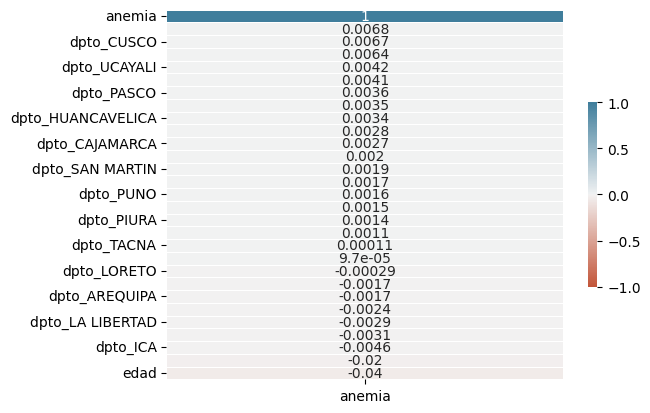

In [ ]:
sns.heatmap(
    data=corr_class.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

# escalamos los valores para modelos

In [ ]:
onehot_encoded_columns = [col for col in data_transformed_df.columns if col.startswith('dpto_')]
numerical_features = ['mes', 'edad']

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
data_transformed_df[numerical_features] = scaler.fit_transform(data_transformed_df[numerical_features])
data_transformed_df

,mes,sexo,dpto_AMAZONAS,dpto_ANCASH,dpto_APURIMAC,dpto_AREQUIPA,dpto_AYACUCHO,dpto_CAJAMARCA,dpto_CALLAO,dpto_CUSCO,...,dpto_MOQUEGUA,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI,edad,anemia
0,1.434531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.951097,1.0
1,1.434531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.951097,1.0
2,-0.306583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.487332,1.0
3,-1.177140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023568,1.0
4,1.434531,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.951097,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297815,0.563974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.878626,1.0
1297816,-1.177140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.269920,1.0
1297817,-0.886954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440197,1.0
1297818,-0.596768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440197,1.0


##  modleo de regresion logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = data_transformed_df.drop('anemia', axis=1)
y = data_transformed_df['anemia']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9977385153565209


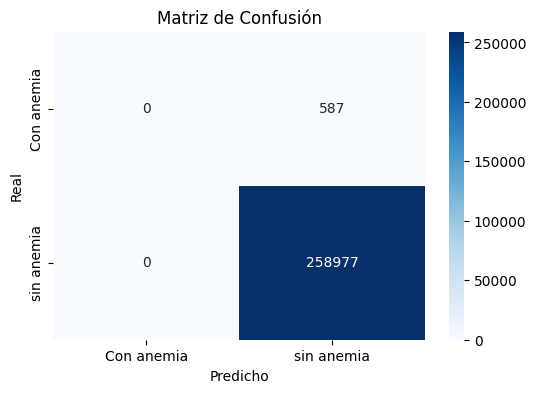

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Con anemia', 'sin anemia'], yticklabels=['Con anemia', 'sin anemia'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# MODELO DE ARBOL DE DECISION

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=00000)
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9978386833305081


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# definirmos varios parametros
param_grid = {
    'max_depth': [3,4,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

print("Mejores parametros : ",grid_search.best_params_)


Mejores parametros :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy best model : {accuracy}')

Accuracy best model : 0.9978386833305081


<ipython-input-52-092bc5be5a1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns,y=best_model.feature_importances_,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)


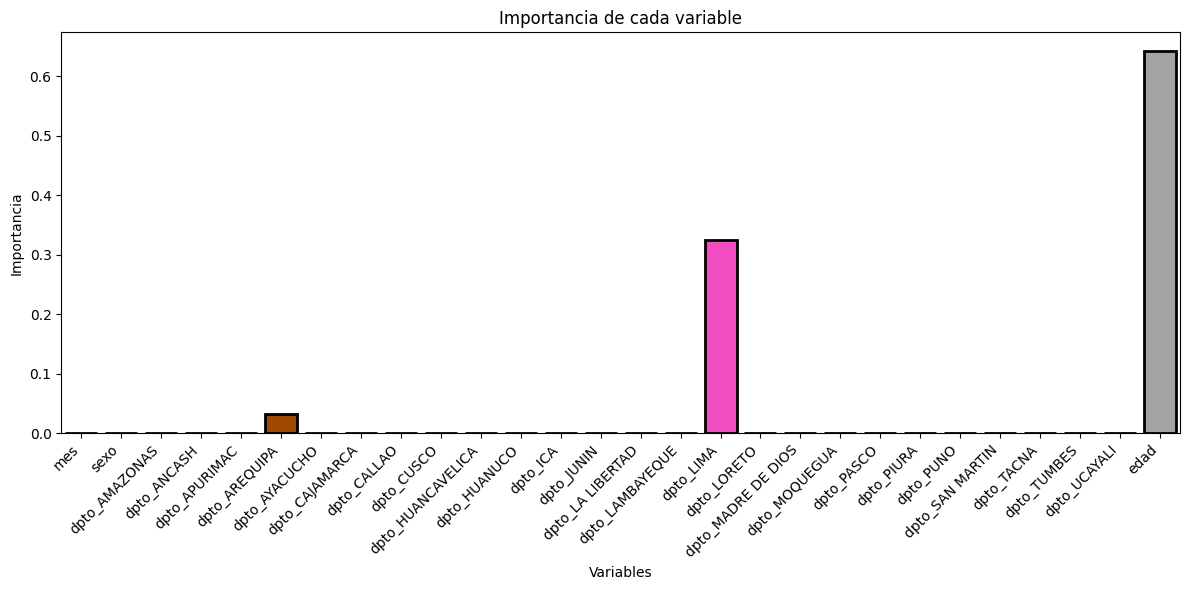

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=best_model.feature_importances_,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)
plt.title('Importancia de cada variable')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

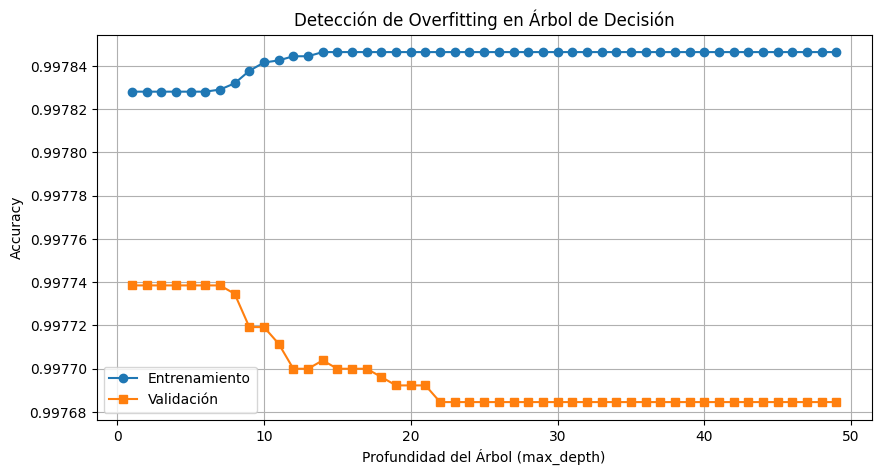

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Datos (usamos X, y de tu dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
val_scores = []
max_depths = range(1, 50)  # Profundidades de 1 a 20

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()